In [1]:
import sys
sys.path.append("../") # ugly way to have .py files in the PYTHONPATH

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_keyword_lists
from utils import get_config
from figures import pie_plot, pie_timeline

In [3]:
CONFIG = "../config.yaml"
DIR = ".."

In [4]:
config = get_config(CONFIG, section="figures")


In [5]:
config_files = get_config(CONFIG, section="files")
info_filename = f"{DIR}/{config_files['data_dir']}/{config_files['info_filename']}"
keys_filename = f"{DIR}/{config_files['data_dir']}/keywords_{config_files['info_filename']}"
df_info = pd.read_csv(info_filename, index_col=0)
df_keys = pd.read_csv(keys_filename, index_col=0).set_index("id") != "NO"

In [6]:
key_names = config.get("key_names")
key_labels = config.get("key_labels")


In [7]:
df_keys

,reinforcement learning,evolutionary algorithms,bayesian optimisation,multi-objective optimisation,supernet,weight sharing,differentiable optimisation,zero cost proxies or training free,hardware aware search,surrogate models
id,,,,,,,,,,
http://arxiv.org/abs/2006.06936v2,False,False,False,False,False,False,False,False,False,False
http://arxiv.org/abs/2009.13266v1,False,False,False,False,False,False,False,False,False,False
http://arxiv.org/abs/2203.01559v1,False,True,False,False,True,True,False,False,False,True
http://arxiv.org/abs/2210.17180v2,False,False,False,False,False,False,False,False,False,False
http://arxiv.org/abs/2112.07805v1,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
http://arxiv.org/abs/2303.02801v1,False,True,False,True,False,False,False,False,False,False
http://arxiv.org/abs/2305.10987v1,False,True,False,False,False,False,False,False,False,False
http://arxiv.org/abs/2403.08901v3,False,False,False,True,False,False,False,False,False,True


# Fixed keywords

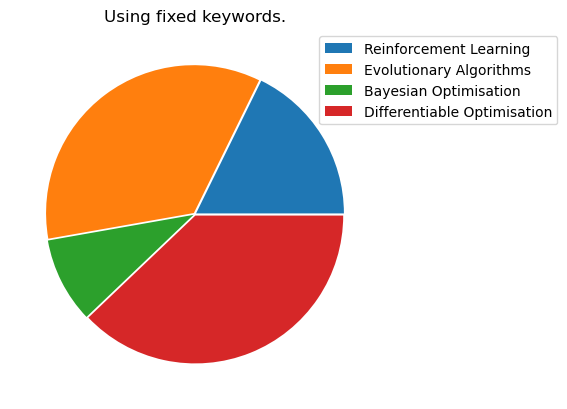

In [8]:
pie_plot(df_keys, key_names, key_labels, "Using fixed keywords.", "optimisation_pie_fixed_keywords.png")


In [9]:
timeline = (
    df_keys[key_names]
    .merge(df_info[["year","id"]], on="id")
    .drop(columns=["id"])
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline 

,reinforcement learning,evolutionary algorithms,bayesian optimisation,differentiable optimisation
year,,,,
2017,9,16,2,5
2018,24,37,7,15
2019,38,51,18,65
2020,37,69,20,103
2021,32,68,13,110
2022,24,52,20,54
2023,19,56,12,55
2024,28,61,19,52


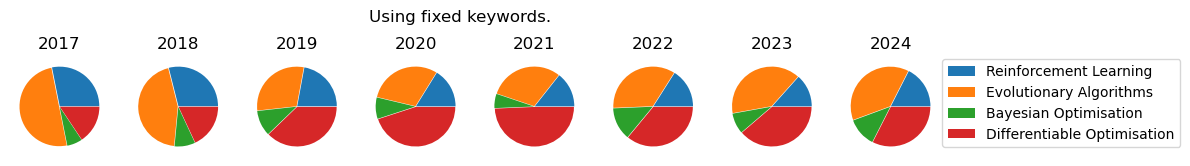

In [10]:
pie_timeline(timeline, key_names, key_labels, "Using fixed keywords.", "optimisation_pie_timeline_fixed_keywords.png")

# LLM Keywords

In [11]:
short_keys = config.get("short_keys")

In [14]:
df_years = df_info[["id", "year"]].set_index("id")
dict_keys = {
    key: " ".join(keys)
    for key, keys in read_keyword_lists(f"{DIR}/{config_files['data_dir']}").items()
}

In [15]:
for name, key in zip(key_names, short_keys):
    ids = [
        id for id in dict_keys.keys()
        if key in dict_keys[id]
    ]
    df_years[name] = False
    df_years.loc[df_years.index.isin(ids), name] = True

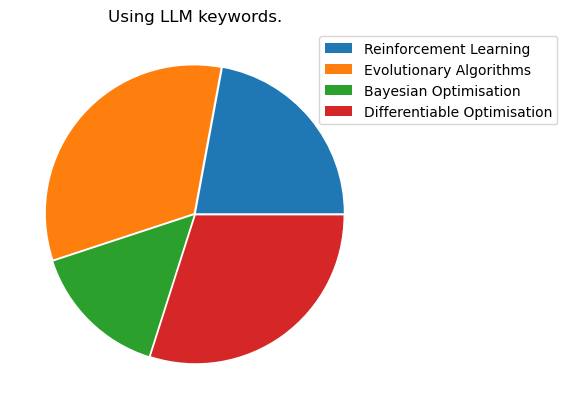

In [16]:
pie_plot(df_years, key_names, key_labels, "Using LLM keywords.", "optimisation_pie_LLM_keywords.png")


In [17]:
timeline2 = (
    df_years[key_names + ["year"]]
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline2

,reinforcement learning,evolutionary algorithms,bayesian optimisation,differentiable optimisation
year,,,,
2017,5,12,1,0
2018,15,16,7,6
2019,27,23,19,33
2020,24,35,18,44
2021,20,35,10,46
2022,16,28,13,22
2023,10,24,11,22
2024,21,31,15,18


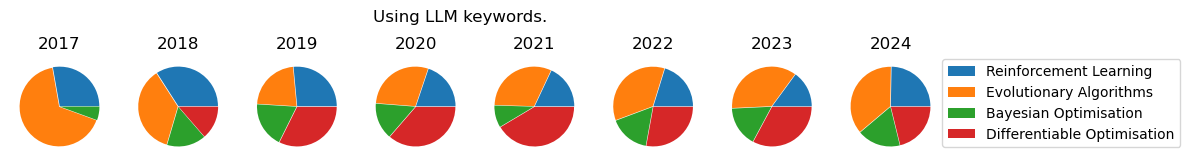

In [18]:
pie_timeline(timeline2, key_names, key_labels, "Using LLM keywords.", "optimisation_pie_timeline_LLM_keywords.png")